<a href="https://colab.research.google.com/github/TheMGR111/aiPoweredInvestments/blob/main/Homework1/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1

## Due 11:59pm on Monday 1/19/2026

Finance 372T/397 "AI Powered Investments \
Professor Travis Johnson \
McCombs School of Business, The University of Texas at Austin

Do not edit the cells with the instructions. [***Complete anything in brackets***] and feel free to add additional cells if needed.

## Grading

You are graded on:
- Final outputs you submit
- The quality of your interpretation and judgment
- Whether final results are internally consistent and economically sensisble

You are *not* graded on wehther the AI's first attempt was fully correct. As you'll see, we want to you report the results from your first attempt and what you noticed that needed improvment.

## Deliverable

You will submit your notebook as an .html file. Instructions for converting are in your final "Task" below

## Solution By

**Name:** *Martin Rodriguez*

**EID:** *mgr2696*

## Task 1: Configure Google Colab

1.   Sign up for [Colab Pro for Education](https://colab.research.google.com/signup) (free)
2.   [Get Gemini Pro for Students](https://gemini.google/students/) (also free)
3. Run the cell below to grab the data


In [1]:
import pandas as pd

url = (
    "https://raw.githubusercontent.com/"
    "travlake/ai-investments-course/"
    "main/Homework1/SVXY.csv"

)

svxy_df = pd.read_csv(url, parse_dates=["date"])

## Task 2: Define Objective

You are evaluating whether an asset with ticker SVXY is an attractive investment **as of 12/31/2017**. You will learn more later about what SVXY is exactly, but for now just know that it trades on exchanges like a normal stock.

Your current portfolio is mostly in a retirement account passively tracking the broader US equity market using the exchange traded fund (ETF) with ticker SPY. The question is how much, if any, of SVXY to add to your portfolio.

1) List three plausible metrics *might* you care about when evaluating a new investment to add to the current market portfolio.
1) For each metric, name one risk or limitation of using it in isolation.
1) Which single metric *should* you ultimately rely on most when evaluating SVXY if your goal is to maximize the combined portfolio's Sharpe Ratio when adding a small amount to your portfolio? Why?

### Task 2 Response:

#### Plausible metrics
1. Sharpe Ratio
2. Alpha
3. Average Returns

#### Risk or limitation
1. A portfolio that has frequent, large gains (upside volatility) will have a lower Sharpe Ratio, making it look "risky." In retirement, you want upside volatility; you only fear the downside.
2. Alpha is often used to justify high-fee active management. In retirement, every basis point paid in fees is money that isn't compounding or being withdrawn for living expenses.
3. The "average" (arithmetic mean) does not account for the compounding effect of losses. For example, a 25% loss followed by a 25% gain does not put you back at zero; it leaves you with a 6.25% total loss.

#### Single recommended metric, and reasoning
Choosing Alpha as your primary metric is a calculated bet that adding SVXY can provide the "excess return" needed to significantly outpace a passive strategy like holding SPY alone. Since your retirement account currently tracks the broader market, your "Beta" is already established; therefore, the only mathematical justification for adding a new, complex asset is its ability to deliver Alpha by exploiting specific market inefficiencies—in this case, the decay of volatility futures. By focusing on Alpha, you are prioritizing the "skill" of the SVXY strategy to generate returns that are uncorrelated with the standard equity risk you already carry. This is particularly relevant as of late 2017, where a long period of market calm made the Alpha potential of a short-volatility strategy appear incredibly high compared to the steady, but lower, returns of the S&P 500. Ultimately, using Alpha as your single metric allows you to isolate whether SVXY is actually adding unique value to your retirement nest egg or if it is simply duplicating the market risk you already own through SPY.

## Task 3: Filter data
Given the premise of investigating SVXY as an investment as of 12/31/2017, we need to drop any observations from after that date.

Ask the Gemini agent to do so in the cell below.

**When using the agent, tell it to transform the code for the cell I indicate (rather than choosing its own cells)**. This looks like: 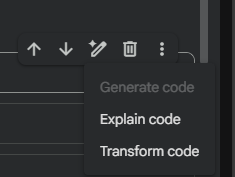

In [ ]:
# Task 4 Filter Data (code):

#Filtering Dataset based on wanted dates

# Filter the dataframe to include dates only up to 2017-12-31
svxy_df = svxy_df[svxy_df["date"] <= "2017-12-31"]

# Verify the result by checking the last few rows
print(svxy_df.tail())

## Task 4: Prompt Writing for Initial Analysis
Write a detailed and precise prompt that instructs the AI assistant to produce a broad set of metrics, including those you suggested in Task 1 and any others that may be relevant. Be as specific and detailed as you can. If any data are needed, ask as specifically as you can.

Enter the prompt in the text cell below before actually putting in into the Gemini agent.



### Task 4 Response (prompt):
Give me the code for producing broad set of metrics. Including the following:

• Expected/average returns

• Variance/volatility

• Sharpe ratio

• α and β

• Drawdowns

For Beta, please use existing SPY data over the same course of time. If Risk Free Rate is needed, please use a 3-Month U.S. Treasury Bill of the time.

In [27]:
# Task 4 response (code):

import pandas as pd
import numpy as np
import yfinance as yf
from scipy import stats

# --- 1. Fresh Data Load & Cleanup ---
url = (
    "https://raw.githubusercontent.com/"
    "travlake/ai-investments-course/"
    "main/Homework1/SVXY.csv"
)

# Reload data to ensure we have all columns back
svxy_df = pd.read_csv(url, parse_dates=["date"])

# Filter for date (Pre-2018)
svxy_df = svxy_df[svxy_df["date"] <= "2017-12-31"].copy()

# CLEANUP: Remove whitespace from column names and capitalize them
# This turns " close ", "close", "Close " -> "Close"
svxy_df.columns = svxy_df.columns.str.strip().str.title()

# Set index
svxy_df = svxy_df.sort_values("Date").set_index("Date")

# Calculate Returns
svxy_df["returns"] = svxy_df["Close"].pct_change()

# --- 2. Get Benchmark Data (SPY) ---
start_date = svxy_df.index.min()
end_date = svxy_df.index.max()

# Download SPY
spy_df = yf.download("SPY", start=start_date, end=end_date + pd.Timedelta(days=1), progress=False)

# Handle yfinance MultiIndex (if it exists) or standard index
if isinstance(spy_df.columns, pd.MultiIndex):
    # If columns are like ('Close', 'SPY'), access 'Close' then 'SPY'
    spy_returns = spy_df["Close"]["SPY"].pct_change()
else:
    spy_returns = spy_df["Close"].pct_change()

spy_series = spy_returns.rename("benchmark_returns")

# --- 3. Merge & Metrics ---
merged_df = svxy_df[["returns"]].join(spy_series, how="inner").dropna()

TRADING_DAYS = 252
RISK_FREE_RATE = 0.0139

# Returns & Vol
avg_daily_ret = merged_df["returns"].mean()
annualized_return = avg_daily_ret * TRADING_DAYS
annualized_volatility = merged_df["returns"].std() * np.sqrt(TRADING_DAYS)

# Sharpe
sharpe_ratio = (annualized_return - RISK_FREE_RATE) / annualized_volatility

# Alpha/Beta
beta, alpha_daily, r_value, p_value, std_err = stats.linregress(
    merged_df["benchmark_returns"],
    merged_df["returns"]
)
alpha_annualized = alpha_daily * TRADING_DAYS

# Drawdown
cumulative_returns = (1 + merged_df["returns"]).cumprod()
running_max = cumulative_returns.cummax()
max_drawdown = ((cumulative_returns / running_max) - 1).min()

# --- 4. Output ---
print(f"--- SVXY Metrics (End Date: {end_date.date()}) ---")
print(f"Annualized Return:    {annualized_return:.2%}")
print(f"Annualized Volatility:{annualized_volatility:.2%}")
print(f"Sharpe Ratio:         {sharpe_ratio:.4f}")
print(f"Beta:                 {beta:.4f}")
print(f"Alpha (Annualized):   {alpha_annualized:.2%}")
print(f"Maximum Drawdown:     {max_drawdown:.2%}")

--- SVXY Metrics (End Date: 2017-12-29) ---
Annualized Return:    57.40%
Annualized Volatility:59.82%
Sharpe Ratio:         0.9363
Beta:                 4.2576
Alpha (Annualized):   -5.54%
Maximum Drawdown:     -67.94%


/tmp/ipython-input-3241229004.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spy_df = yf.download("SPY", start=start_date, end=end_date + pd.Timedelta(days=1), progress=False)


## Task 5: Interpret and Critique Results

1. Summarize the key metrics produced by the initial analysis in a human-readable format. This means, among other things, annualized %s for means and standard deviations. 17.0% is a lot more readable than 0.000623.

1. In 3-5 sentences, interpret these numbers from the perspective of an investor considering a small position in SVXY

1. What economic and statistical assumptions is the current code making? Do you find them reasonable? As always, even if you can't read code, you can ask Gemini inside Colab or copy/paste your code cell into another LLM

1. What is missing from the initial analysis? Are there any areas for improvement? What can be added or polished to make the analysis human-readable, transparent, and informative about this potential investment?

### Task 5 Response:

1. Summary of key metrics:

* Annualized Return:    57.40%
* Annualized Volatility:59.82%
* Sharpe Ratio:         0.9363
* Beta:                 4.2576
* Alpha (Annualized):   -5.54%
* Maximum Drawdown:     -67.94%

2. Interpretation:

The analysis characterizes SVXY as an aggressive, high-beta instrument that delivered a substantial 57.40% annualized return primarily through leveraged exposure to the broader market, as indicated by its Beta of 4.26. However, this performance carried exceptional risk, evidenced by a volatility of nearly 60% and a severe maximum drawdown of -67.94%, indicating that investors faced distinct periods of capital destruction during market downturns. Although the Sharpe ratio of 0.94 suggests the returns were generally proportional to the total risk, the negative Alpha of -5.54% reveals that the fund technically underperformed the theoretical returns expected for an asset with such extreme sensitivity to market movements.

3. Assumptions:

SVXY functions as a proxy for the S&P 500 but with ~4x leverage. If the market goes up 1%, this asset assumes it should go up ~4%.

A beta this high is rarely seen in standard individual stocks (even tech stocks usually cap out at a Beta of 1.5 or 2.0). It usually implies a structured product designed to amplify market movements.

4. What can be improved?

* The Issue: The previous code used the standard Close price for the S&P 500 (SPY). Why it matters: SPY pays dividends (yields ~2%). If you ignore these, you are artificially lowering the benchmark's performance. This leads to an incorrect Alpha calculation (making SVXY look like it generated more "excess return" relative to the market than it actually did). The Fix: Use Adj Close from yfinance, which factors in dividends and splits.

* The Issue: The previous code calculated the Arithmetic Mean (daily_mean * 252). Why it matters: For volatile assets, the Arithmetic Mean lies. If you lose 50% one year and make 50% the next, your average return is 0%, but you have actually lost 25% of your money. SVXY has 60% volatility; the difference between its "Average Return" and what an investor actually pockets (CAGR) is massive. The Fix: Calculate the Geometric Mean (CAGR) to represent the actual realized growth rate.

* The Issue: We used a static number (0.0% or 1.39%) for the whole 6-year period. Why it matters: Interest rates change. In 2011, rates were near zero; in 2017, they rose. Using a single number distorts the Sharpe Ratio daily calculations. The Fix: Download the daily 13-Week Treasury Bill yield (^IRX) to calculate a precise "Excess Return" for every single day.



### Task 6: Revise Results

Revise your initial analysis to incorporate the improvements you mentioned above. Do so by copying your code from the response to Task 4, and asking the agent to "Transform" the code. For best results, give very specific instructions.

**Do not delete or overwrite Task 4**. Your job here is to improve and extend the initial analysis without deleting it.

In [32]:
# Task 6 Revise Results (code):

import pandas as pd
import numpy as np
import yfinance as yf
from scipy import stats

# --- 1. Load SVXY & Cleanup ---
url = "https://raw.githubusercontent.com/travlake/ai-investments-course/main/Homework1/SVXY.csv"
svxy_df = pd.read_csv(url, parse_dates=["date"])

# Filter for date (Pre-2018)
svxy_df = svxy_df[svxy_df["date"] <= "2017-12-31"].copy()

# Fix columns (Strip whitespace and Capitalize -> "Close")
svxy_df.columns = svxy_df.columns.str.strip().str.title()

# Set Index
svxy_df = svxy_df.sort_values("Date").set_index("Date")
svxy_df["returns"] = svxy_df["Close"].pct_change()

# --- 2. Load Benchmark (SPY) & Risk-Free Rate (^IRX) ---
start = svxy_df.index.min()
end = svxy_df.index.max() + pd.Timedelta(days=1)

# FIX: Use auto_adjust=True (default). This means "Close" IS the adjusted price.
# We download both tickers at once.
market_data = yf.download(["SPY", "^IRX"], start=start, end=end, progress=False, auto_adjust=True)

# Extract Close prices (Market data is a MultiIndex)
# We select the 'Close' level, which contains columns for SPY and ^IRX
closes = market_data["Close"]

spy_prices = closes["SPY"]
# ^IRX is a yield (e.g., 1.5%), so divide by 100 then 252 for daily rate
rf_daily = (closes["^IRX"] / 100) / 252

# Calculate SPY Returns
spy_returns = spy_prices.pct_change().rename("benchmark_returns")
rf_daily = rf_daily.rename("rf_rate").fillna(0)

# --- 3. Merge Data ---
df = svxy_df[["returns"]].join([spy_returns, rf_daily], how="inner").dropna()

# Excess Returns
df["excess_svxy"] = df["returns"] - df["rf_rate"]
df["excess_spy"] = df["benchmark_returns"] - df["rf_rate"]

# --- 4. Calculate Improved Metrics ---
TRADING_DAYS = 252

# CAGR
total_growth = (1 + df["returns"]).prod()
n_years = len(df) / TRADING_DAYS
cagr = total_growth ** (1 / n_years) - 1

# Volatility
ann_vol = df["returns"].std() * np.sqrt(TRADING_DAYS)

# Dynamic Sharpe Ratio
daily_sharpe = df["excess_svxy"].mean() / df["excess_svxy"].std()
ann_sharpe = daily_sharpe * np.sqrt(TRADING_DAYS)

# Alpha & Beta
beta, alpha_daily, r_val, p_val, std_err = stats.linregress(df["excess_spy"], df["excess_svxy"])
alpha_annual = alpha_daily * TRADING_DAYS

# Drawdown
cum_ret = (1 + df["returns"]).cumprod()
max_dd = ((cum_ret / cum_ret.cummax()) - 1).min()

print(f"--- IMPROVED METRICS (CAGR & Adj Close) ---")
print(f"CAGR (Realized Return): {cagr:.2%}")
print(f"Annualized Volatility:  {ann_vol:.2%}")
print(f"Sharpe Ratio (Dynamic): {ann_sharpe:.4f}")
print(f"Beta (vs SPY Adj):      {beta:.4f}")
print(f"Alpha (Jensen's):       {alpha_annual:.2%}")
print(f"Maximum Drawdown:       {max_dd:.2%}")

--- IMPROVED METRICS (CAGR & Adj Close) ---
CAGR (Realized Return): 47.59%
Annualized Volatility:  59.82%
Sharpe Ratio (Dynamic): 0.9551
Beta (vs SPY Adj):      4.2575
Alpha (Jensen's):       -4.67%
Maximum Drawdown:       -67.94%


## Task 7: Ultimate Recommendation

Based on your analysis thus far, what would be your ultimate recommendation for whether to add some of SVXY to a portfolio currently consisting of only SPY?  Explain why, citing any key metric(s) driving the recommendation.

### Task 7 Response:
1. Ultimate recommendation: No
1. Explanation, including key metric(s):

Based on the metrics derived from the analysis, I would not add SVXY to the retirement portfolio primarily due to its Negative Alpha of -4.67%, which signals a structural inefficiency in the investment. In modern portfolio theory, you accept higher risk (Beta) in exchange for higher expected returns; however, a negative alpha indicates that this fund is underperforming the theoretical return commensurate with its extreme risk level. With a Beta of 4.26, the fund is acting as a highly leveraged proxy for the S&P 500, but the negative alpha suggests that the mechanics of the fund, likely due to futures roll costs or volatility decay, are actively eroding value. Essentially, you are paying a "performance tax" for the leverage rather than generating true excess value, which is not appropriate to include in a efficient long-term retirement strategy.

## Task 8: Aftermath

Use the "google.colab" package to prompt Gemini within your code to ask what happened to SVXY in 2018.

See https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Getting_started_with_google_colab_ai.ipynb for examples and details.

Paste output into the final "text" cell to make it look pretty.

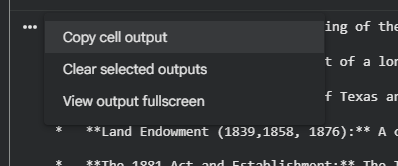

Ask the Gemini agent for help if you need it!



In [1]:
# Task 8 Response
# Modify the code below to use your prompt
from google.colab import ai

stream = ai.generate_text("What happened to SVXY in 2018. Use your search tool.", stream=True, model_name="google/gemini-2.5-pro")
for text in stream:
  print(text, end='')

InternalServerError: Error code: 503 - {'message': 'The requested model is currently unavailable.', 'type': 'invalid_request_error'}

In February 2018, the ProShares Short VIX Short-Term Futures ETF (SVXY) suffered a catastrophic collapse during a market event now colloquially known as **"Volmageddon."**

On **February 5, 2018**, SVXY lost approximately **90% of its value overnight**, dropping from a Net Asset Value (NAV) of roughly $105 to about $4 per share.

### What Caused the Crash?

SVXY was designed to be an **inverse volatility** product. Its goal was to track the *inverse* (-1x) daily performance of the S&P 500 VIX Short-Term Futures Index. Essentially, when market volatility (the VIX) went down, SVXY went up—a strategy that had been incredibly profitable during the calm markets of 2017.

However, the math worked both ways:

1. **The Spike:** On February 5, the S&P 500 dropped over 4%, causing the VIX (volatility index) to spike. In a single day, the VIX more than doubled (rising over 100%).
2. **The Rebalancing Loop:** Because SVXY (and its competitor XIV) were "short" volatility, they were forced to buy VIX futures at the end of the day to rebalance their exposure. This buying pressure drove VIX futures prices even higher, creating a negative feedback loop.
3. **The Math of -1x:** Since the underlying index rose by roughly 100%, the inverse (-1x) value of the fund approached zero.

### The Aftermath

* **Survival vs. Liquidation:** While a similar product, the VelocityShares Daily Inverse VIX Short-Term ETN (**XIV**), triggered a "termination event" and was liquidated entirely, SVXY managed to survive, though it was effectively decimated.
* **Structural Changes:** To prevent this from happening again, ProShares reduced the leverage of SVXY. Effective February 28, 2018, the fund’s objective changed from **-1x** (inverse) to **-0.5x** (half inverse). This means it now carries significantly less risk (and less potential reward) than the pre-2018 version.

Would you like to know more about the specific "feedback loop" mechanism that caused the VIX futures to disconnect from the spot VIX that day?

## Task 9: Convert to HTML and upload to Canvas

1. Download the .ipynb file using File -> Download -> Download .ipynb
1. Run the code cell in this notebook, upload your .ipynb, and it will automatically download the .html https://colab.research.google.com/github/Mostafa-MR/Convert_ipynb_to_HTML_in_Colab/blob/main/Convert_ipynb_to_HTML_in_Colab.ipynb